In [1]:
from phylodeep import BD, BDEI, BDSS, FULL
from phylodeep.modeldeep import modeldeep
from phylodeep.paramdeep import paramdeep


path_to_tree = "/Users/mmcanear/Projects/PhD_Courses/STAT700/phylodeep/test_tree_HIV_Zurich/Zurich.trees"

# set presumed sampling probability
sampling_proba = 0.25

# NOTE: Absolutely does not work due to broadcasting issues
# a priori check for models BD, BDEI, BDSS
# checkdeep(path_to_tree, model=BD, outputfile_png='BD_a_priori_check.png')
# checkdeep(path_to_tree, model=BDEI, outputfile_png='BDEI_a_priori_check.png')
# checkdeep(path_to_tree, model=BDSS, outputfile_png='BDSS_a_priori_check.png')


# model selection
model_BDEI_vs_BD_vs_BDSS = modeldeep(
    path_to_tree, sampling_proba, vector_representation=FULL
)

# the selected model is BDSS

# parameter inference
param_BDSS = paramdeep(
    path_to_tree,
    sampling_proba,
    model=BDSS,
    vector_representation=FULL,
    ci_computation=True,
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


# Encoding

Exploratory analysis of how to actually get the CBLV representation in Phylodeep; this is NOT strictly provided by the package, it seems.

In [ ]:
from phylodeep.encoding import encode_into_most_recent, encode_into_summary_statistics
from ete3 import Tree
from pathlib import Path
import pandas as pd

output_dir = Path("../output_trees")
param_files = output_dir.glob("*.csv")

def read_tree(tree_file):
    with open(tree_file, "r") as f:
        nwk_str = f.readline().strip()   
    tree = Tree(nwk_str, format=1)
    return encode_into_most_recent(tree, 0.5)

params = pd.concat([
    pd.read_csv(f) for f in param_files
])

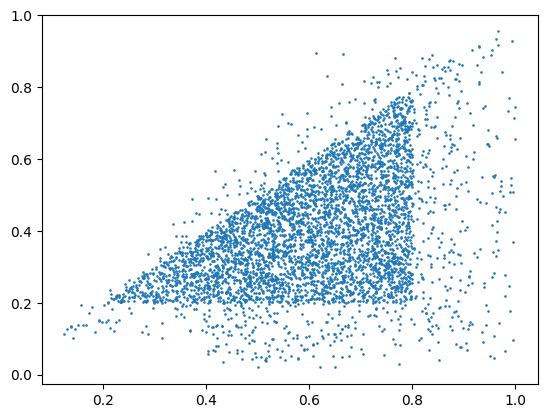

In [61]:
from matplotlib import pyplot as plt

plt.scatter(params["la_II"], params["psi_I"], s=0.75)


In [ ]:
import pandas as pd
sampling_proba = 0.5



all_tree_files = output_dir.glob("*.nwk")

all_tree_outputs = pd.concat([read_tree(f)[0] for f in list(all_tree_files)[:100]])

# tree_df = pd.concat(
#     [encode_into_most_recent(tree, sampling_proba) for tree in all_trees]
# )



ValueError: No objects to concatenate